Khalid Waleed Alhilal
2230000788
8m02

# LAB4


### Import necessary libraries as specified in the lab session

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure
from skimage.exposure import match_histograms

#### Task 1: Contrast Stretching " Moon image"

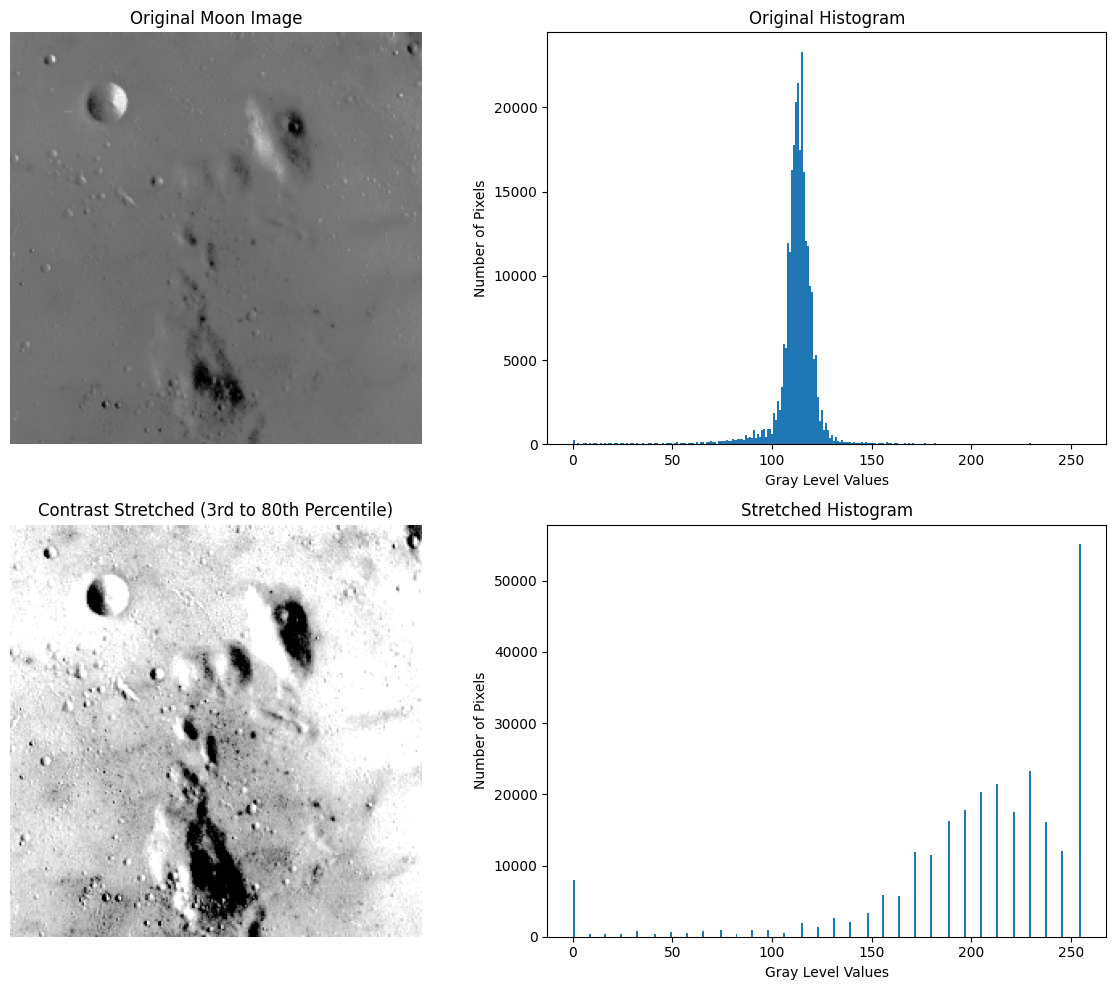

In [9]:
img_moon = data.moon()

# Calculate the 3rd and 80th percentiles
p3, p80 = np.percentile(img_moon, (3, 80))

# Rescale intensity to stretch the contrast between the 3rd and 80th percentiles
img_rescale = exposure.rescale_intensity(img_moon, in_range=(p3, p80))

# Plot the image with histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Image & Histogram
axes[0, 0].imshow(img_moon, cmap='gray')
axes[0, 0].set_title('Original Moon Image')
axes[0, 0].axis('off')

axes[0, 1].hist(img_moon.flat, bins=256, range=(0, 255))
axes[0, 1].set_title('Original Histogram')
axes[0, 1].set_xlabel('Gray Level Values')
axes[0, 1].set_ylabel('Number of Pixels')

# Rescaled Image & Histogram
axes[1, 0].imshow(img_rescale, cmap='gray')
axes[1, 0].set_title('Contrast Stretched (3rd to 80th Percentile)')
axes[1, 0].axis('off')

axes[1, 1].hist(img_rescale.flat, bins=256, range=(0, 255))
axes[1, 1].set_title('Stretched Histogram')
axes[1, 1].set_xlabel('Gray Level Values')
axes[1, 1].set_ylabel('Number of Pixels')

plt.tight_layout()
plt.show()

#### Task 2: Histogram Equalization

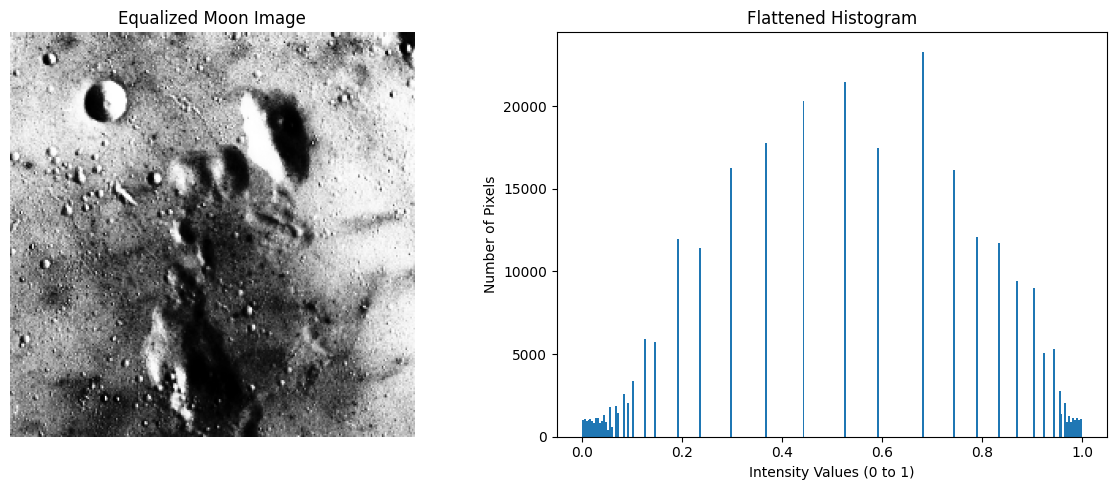

In [8]:
# Equalize the histogram of the original image
img_eq = exposure.equalize_hist(img_moon)

# Plot the equalized image and its histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Equalized Image
axes[0].imshow(img_eq, cmap='gray')
axes[0].set_title('Equalized Moon Image')
axes[0].axis('off')

# Histogram of the equalized image
# Note: Since equalize_hist returns a float image in the range [0, 1], i adjust the histogram range accordingly.
axes[1].hist(img_eq.flat, bins=256, range=(0, 1.0))
axes[1].set_title('Flattened Histogram')
axes[1].set_xlabel('Intensity Values (0 to 1)')
axes[1].set_ylabel('Number of Pixels')

plt.tight_layout()
plt.show()

#### Task 3: Histogram Matching

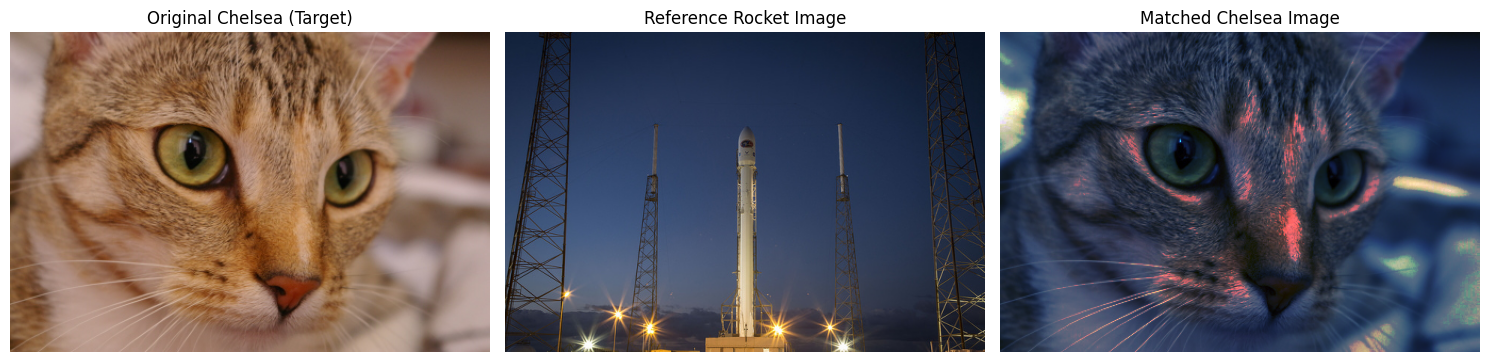

In [7]:
# Load the target and reference images from skimage's data module
img_chelsea = data.chelsea() # Target image
img_rocket = data.rocket()   # Reference image

# Perform histogram matching
# Use the match_histograms function to adjust the pixel values of the target image (chelsea) to match the histogram of the reference image (rocket).
matched = match_histograms(img_chelsea, img_rocket, channel_axis=-1)

# Plot the results side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_chelsea)
axes[0].set_title('Original Chelsea (Target)')
axes[0].axis('off')

axes[1].imshow(img_rocket)
axes[1].set_title('Reference Rocket Image')
axes[1].axis('off')

axes[2].imshow(matched)
axes[2].set_title('Matched Chelsea Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()